# Quantization Error Analysis

Synthetic data and DeepSeek o_proj weight experiments in one notebook.

In [18]:
from pathlib import Path

def find_repo_root(start=None) -> Path:
    root = Path.cwd() if start is None else Path(start)
    while root != root.parent and not (root / 'compare_reconstr_error_synth_data.py').exists():
        root = root.parent
    if not (root / 'compare_reconstr_error_synth_data.py').exists():
        raise FileNotFoundError('Could not locate repo root containing compare_reconstr_error_synth_data.py')
    return root

repo_root = find_repo_root()
print(f'Using repo root: {repo_root}')


Using repo root: /Users/jrock/repos/quantization-plots


In [19]:
# Ensure dependencies are available for this kernel
import importlib.util
import subprocess
import sys

required = [
    'numpy',
    'matplotlib',
    'safetensors',
    'torch',
    'huggingface_hub',
    'transformers',
    'tqdm',
]
missing = [pkg for pkg in required if importlib.util.find_spec(pkg) is None]
if missing:
    print('Missing packages:', ', '.join(missing))
    subprocess.run([sys.executable, '-m', 'pip', 'install', '-r', str(repo_root / 'requirements.txt')], check=True)
else:
    print('All required packages already installed.')


All required packages already installed.


# Quantization Error on Synthetic Data

Runs `compare_reconstr_error_synth_data.py` to visualize amax reconstruction curves for **all** supported formats.

In [21]:
from pathlib import Path
import subprocess
import sys

from IPython.display import Image, display


/Users/jrock/repos/quantization-plots/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jrock/repos/quantization-plots/compare_reconstr_error_synth_data.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.0, 0.0, 0.8, 1.0])


Saved plot to /Users/jrock/repos/quantization-plots/plots/notebooks/compare_reconstr_error_synth_data.png


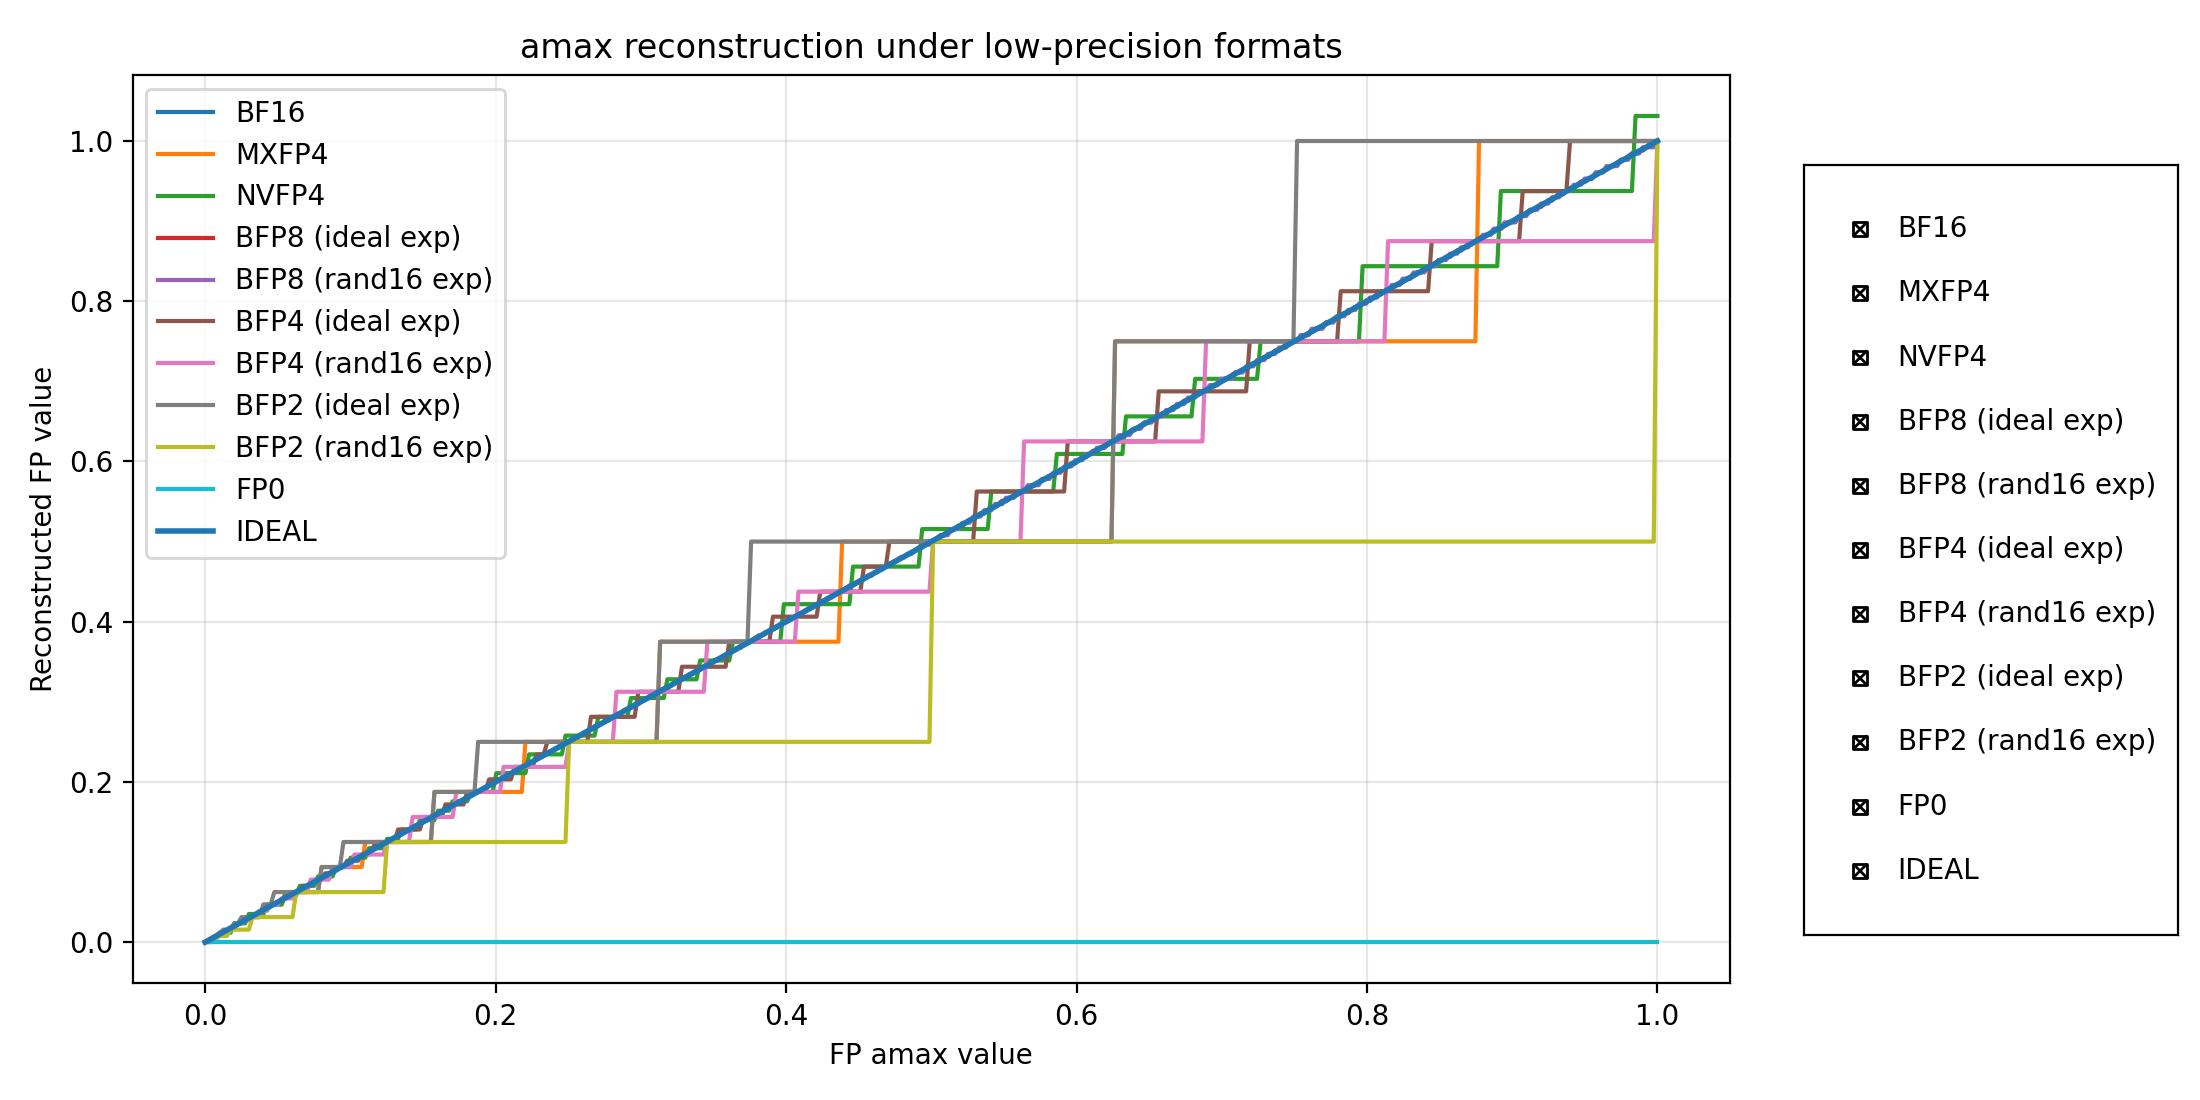

In [22]:
repo_root = find_repo_root()
script_path = repo_root / 'compare_reconstr_error_synth_data.py'
if not script_path.exists():
    raise FileNotFoundError(f'Missing script: {script_path}')

out_path = repo_root / 'plots' / 'notebooks' / 'compare_reconstr_error_synth_data.png'
out_path.parent.mkdir(parents=True, exist_ok=True)

cmd = [
    sys.executable,
    str(script_path),
    '-c', 'all',
    '--rand-samples', '100',
    '--out', str(out_path),
    '--no-show',
]
subprocess.run(cmd, check=True, cwd=str(repo_root))

display(Image(filename=str(out_path)))


# Quantization Error on DeepSeek o_proj Weights

Runs `compare_reconstr_error_weights.py` for **o_proj** tensors from `deepseek-ai/DeepSeek-R1` and includes all supported formats in each plot.

In [23]:
from pathlib import Path
import subprocess
import sys

from IPython.display import Image, display


In [25]:
repo_root = find_repo_root()
script_path = repo_root / 'compare_reconstr_error_weights.py'
if not script_path.exists():
    raise FileNotFoundError(f'Missing script: {script_path}')

repo_id = 'deepseek-ai/DeepSeek-R1'
# Quick run by default to avoid long downloads/processing
filter_query = 'model.layers.0.self_attn.o_proj.weight'
points = 400

out_dir = repo_root / 'plots' / 'notebooks' / 'deepseek_o_proj'
out_dir.mkdir(parents=True, exist_ok=True)

cmd = [
    sys.executable,
    str(script_path),
    repo_id,
    filter_query,
    '-c', 'all',
    '--points', str(points),
    '--out-dir', str(out_dir),
]
subprocess.run(cmd, check=True, cwd=str(repo_root))


/Users/jrock/repos/quantization-plots/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
pngs = sorted(out_dir.glob('*.png'))
len(pngs)


In [ ]:
for path in pngs[:12]:
    display(Image(filename=str(path)))
